# Tutorial 4: Inspecting predicted fluxes

In this tutorial we will load and inspect the fluxes predicted by the _Bacillus subtilis_ ME-model.

## Import libraries

In [1]:
from coralme.builder.main import MEBuilder
from coralme.util.flux_analysis import flux_based_reactions
import coralme
import pandas
import tqdm

## Load

Load the ME-model coming out of the Troubleshooter as a JSON

In [2]:
me = coralme.io.json.load_json_me_model("../Tutorial 1 - Full reconstruction/MEModel-step3-bsubtilis-TS.json")

Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-03


Adding Metabolites into the ME-model...                                    : 100.0%|██████████|  4436/ 4436 [00:00<00:00]
Adding ProcessData into the ME-model...                                    : 100.0%|██████████|  4488/ 4488 [00:00<00:00]
Adding Reactions into the ME-model...                                      : 100.0%|██████████|  7466/ 7466 [00:13<00:00]
Updating ME-model Reactions...                                             : 100.0%|██████████|  6121/ 6121 [00:18<00:00]


Load the ME-model coming out of the Troubleshooter as a Pickle

In [ ]:
# me = coralme.io.pickle.load_pickle_me_model("../Tutorial 1 - Full reconstruction/MEModel-step3-bsubtilis-TS.pkl")

## Solve

In [3]:
me.optimize()

The MINOS and quad MINOS solvers are a courtesy of Prof Michael A. Saunders. Please cite Ma, D., Yang, L., Fleming, R. et al. Reliable and efficient solution of genome-scale models of Metabolism and macromolecular Expression. Sci Rep 7, 40863 (2017). https://doi.org/10.1038/srep40863

Iteration	 Solution to check	Solver Status
---------	------------------	-------------
        1	1.4050280687025918	Not feasible
        2	0.7025140343512959	Not feasible
        3	0.3512570171756479	Not feasible
        4	0.1756285085878240	Not feasible
        5	0.0878142542939120	Optimal
        6	0.1317213814408680	Not feasible
        7	0.1097678178673900	Not feasible
        8	0.0987910360806510	Not feasible
        9	0.0933026451872815	Not feasible
       10	0.0905584497405967	Optimal
       11	0.0919305474639391	Not feasible
       12	0.0912444986022679	Optimal
       13	0.0915875230331035	Optimal
       14	0.0917590352485213	Optimal
       15	0.0918447913562302	Optimal
       16	0.0918876694100847

True

## Inspecting fluxes

### Predicted fluxes

In [4]:
fluxes = me.solution.to_frame()
fluxes

,fluxes,reduced_costs
biomass_dilution,9.191045e-02,-5.792190e-01
BSU00360-MONOMER_to_generic_16Sm4Cm1402,1.903005e-12,0.000000e+00
BSU15140-MONOMER_to_generic_16Sm4Cm1402,0.000000e+00,-1.072796e+01
RNA_BSU_rRNA_1_to_generic_16s_rRNAs,2.590010e-06,-1.904183e-32
RNA_BSU_rRNA_16_to_generic_16s_rRNAs,0.000000e+00,-6.441547e-02
...,...,...
TS_zn2_c,-4.326263e-07,0.000000e+00
TS_cobalt2_c,-3.484809e-08,0.000000e+00
TS_thmpp_c,-2.767585e-07,0.000000e+00
TS_fe2_c,-1.273786e-09,0.000000e+00


### Biomass production

In [5]:
fluxes[fluxes.index.str.contains("biomass")]

,fluxes,reduced_costs
biomass_dilution,0.091910,-5.792190e-01
protein_biomass_to_biomass,0.050026,1.162164e-34
mRNA_biomass_to_biomass,0.000161,0.000000e+00
tRNA_biomass_to_biomass,0.000975,0.000000e+00
rRNA_biomass_to_biomass,0.007098,-8.198527e-35
ncRNA_biomass_to_biomass,0.000000,-1.074093e-34
tmRNA_biomass_to_biomass,0.000000,-1.074093e-34
DNA_biomass_to_biomass,0.005449,-1.074093e-34
lipid_biomass_to_biomass,0.000000,-1.074093e-34
constituent_biomass_to_biomass,0.000000,-1.074093e-34


### Transcription rates

In [6]:
fluxes[fluxes.index.str.contains("^transcription_")].head()

,fluxes,reduced_costs
transcription_TU8J2-1223_from_BSU25200-MONOMER,0.000000e+00,-3.819063e-32
transcription_TU8J2-1268_from_BSU25200-MONOMER,2.189264e-10,-1.128219e-32
transcription_TU8J2-805_from_BSU25200-MONOMER,0.000000e+00,-4.714334e-32
transcription_TU8J2-1022_from_BSU25200-MONOMER,0.000000e+00,-4.389422e+02
transcription_TU8J2-458_from_BSU25200-MONOMER,2.542173e-08,2.699993e-32


### Translation rates

In [7]:
fluxes[fluxes.index.str.contains("^translation_")].head()

,fluxes,reduced_costs
translation_BSU00090,3.928828e-09,1.549896e-32
translation_BSU00110,0.000000e+00,8.723787e-34
translation_BSU00120,0.000000e+00,-1.074526e-32
translation_BSU00130,3.028243e-08,-9.361468e-32
translation_BSU00140,0.000000e+00,1.131303e-32


## Biomass profile

We can calculate the predicted biomass composition in this condition by using _flux_based_reactions_ which outputs the mass balance of a metabolite

In [8]:
flux_based_reactions(me,"biomass")

,lb,ub,rxn_flux,met_flux,reaction
biomass_dilution,mu1,mu1,0.091910,-0.091910,1.0 biomass -->
protein_biomass_to_biomass,0.0,1000.0,0.050026,0.078165,1.0 protein_biomass + 0.5625 unmodeled_protein...
rRNA_biomass_to_biomass,0.0,1000.0,0.007098,0.007098,1.0 rRNA_biomass --> 1.0 biomass
DNA_biomass_to_biomass,0.0,1000.0,0.005449,0.005449,1.0 DNA_biomass --> 1.0 biomass
tRNA_biomass_to_biomass,0.0,1000.0,0.000975,0.000975,1.0 tRNA_biomass --> 1.0 biomass
mRNA_biomass_to_biomass,0.0,1000.0,0.000161,0.000161,1.0 mRNA_biomass --> 1.0 biomass
prosthetic_group_biomass_to_biomass,0.0,1000.0,0.000063,0.000063,1.0 prosthetic_group_biomass --> 1.0 biomass
ncRNA_biomass_to_biomass,0.0,1000.0,0.000000,0.000000,1.0 ncRNA_biomass --> 1.0 biomass
constituent_biomass_to_biomass,0.0,1000.0,0.000000,0.000000,1.0 constituent_biomass --> 1.0 biomass
tmRNA_biomass_to_biomass,0.0,1000.0,0.000000,0.000000,1.0 tmRNA_biomass --> 1.0 biomass


<Axes: ylabel='met_flux'>

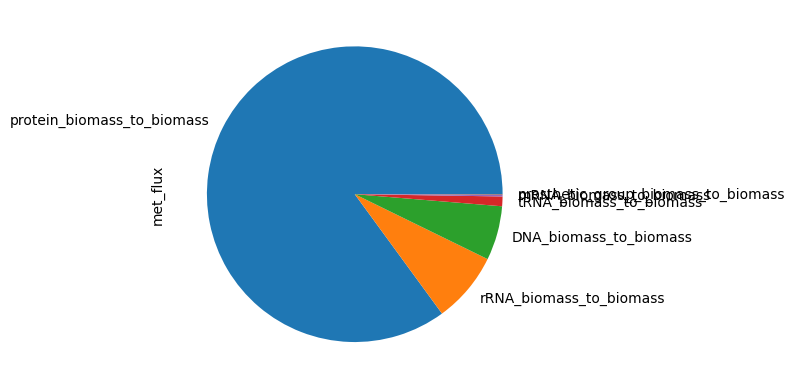

In [9]:
tmp = flux_based_reactions(me,"biomass")["met_flux"]
BiomassComponents = tmp[tmp>0]
BiomassComponents.plot.pie()